In [4]:
# Part 1 -- step1 
# 1.Extrat data from the website as a table.
# 2.Assign columns to the dataframe and then print it.

from bs4 import BeautifulSoup 
import requests as rq
import pandas as pd 
import numpy as np
import re 

response = rq.get("https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares") 
soup = BeautifulSoup(response.content, "html") 
dataframe = pd.read_html(soup.find('table').prettify())[0] 
dataframe.columns = ['rank','x_class','date','region','start_time','max_time','end_time','movie'] 
dataframe.index = range(1, 51) 

dataframe

,rank,x_class,date,region,start_time,max_time,end_time,movie
1,1,X28.0,2003/11/04,486,19:29,19:53,20:06,Movie View archive
2,2,X20.0,2001/04/02,9393,21:32,21:51,22:03,Movie View archive
3,3,X17.2,2003/10/28,486,09:51,11:10,11:24,Movie View archive
4,4,X17.0,2005/09/07,808,17:17,17:40,18:03,Movie View archive
5,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,Movie View archive
6,6,X10.0,2003/10/29,486,20:37,20:49,21:01,Movie View archive
7,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,Movie View archive
8,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,Movie View archive
9,9,X9.0,2006/12/05,930,10:18,10:35,10:45,Movie View archive
10,10,X8.3,2003/11/02,486,17:03,17:25,17:39,Movie View archive


In [5]:
# Part 1 -- step2
# 1.Drop the last column "movie".
# 2.Iterate using iterrows and append the date time to all the times.
# 3.Drop the "date" column and move the column "region" to the last.
# 4.Replace all "-" with "NaN" in the dataframe and then print it.

dataframe2 = dataframe.drop("movie",1)

for i, row in dataframe2.iterrows():    
    start_time2=row["date"]+" "+row["start_time"]    
    max_time2=row["date"]+" "+row["max_time"]    
    end_time2=row["date"]+" "+row["end_time"]    
    dataframe2.at[i,"start_time"] = pd.to_datetime(start_time2)    
    dataframe2.at[i,"max_time"] = pd.to_datetime(max_time2)    
    dataframe2.at[i,"end_time"] = pd.to_datetime(end_time2)

dataframe2 = dataframe2.drop("date",1) 
columns = list(dataframe2) 
columns.remove('region')
columns.append('region')
dataframe2 = dataframe2[columns] 
dataframe2 = dataframe2.replace("-","NaN") 

dataframe2

,rank,x_class,start_time,max_time,end_time,region
1,1,X28.0,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
2,2,X20.0,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
3,3,X17.2,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
4,4,X17.0,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
5,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
6,6,X10.0,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
7,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
8,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
9,9,X9.0,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
10,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


In [6]:
# Part 1 -- step3
# 1.Use BeautifulSoup to get the text.
# 2.Eliminate "\n" and then get rid of useless first 12 lines & last line and store the rest date into "useful" list.
# 3.Create am empty dataframe with columns assigned.
# 4.Split each useful line by space and store the data to corresponding column of the dataframe.
# 5.Print the dataframe.

response3 = rq.get("http://www.hcbravo.org/IntroDataSci/misc/waves_type2.html") 
soup3 = BeautifulSoup(response3.content,"html") 
text = soup3.find('pre').get_text().split("\n")

useful = []

for x in range(12,494):
    useful.append(text[x].split('PHTX')[0])
    
columns3 =  ['start_date','start_time','end_date','end_time' ,'start_frequency',
       'end_frequency','flare_location','flare_region' ,'flare_classification', 
       'cme_date','cme_time','cme_angle','cme_width','cme_speed']

dataframe3 = pd.DataFrame(columns = columns3,index=range(1,483)) 

for x in range(1,483):
    dataframe3.loc[x] = useful[x-1].split()

dataframe3

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed
1,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
2,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
3,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
4,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
5,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,2014/12/13,14:27,12/13,14:51,14000,3900,W90b,-----,----,12/13,14:24,Halo,360,2222
479,2014/12/17,04:09,12/17,04:19,2900,2100,S11E33,12241,M1.1,12/17,02:00,107,108,869
480,2014/12/17,05:00,12/17,05:09,14000,11500,S20E09,12242,M8.7,12/17,05:00,Halo,360,587
481,2014/12/18,22:31,12/18,22:54,5100,1300,S11E15,12241,M6.9,12/19,01:04,Halo,360,1195


In [7]:
# Part 1 -- step4
# 1.Replace all types of missing entries('----','-----','------','--\/--','--:--','Back','BACK','????','???') with "NaN"
# 2.Create columns for "isHalo" and "width_lower_bound"
# 3.Modify and combine time information

from datetime import datetime, timedelta 

dataframe4 = dataframe3.copy() 
dataframe4 = dataframe4.replace(['----','-----','------','--\/--','--:--','Back','BACK','????','???'],'NaN') 

dataframe4['isHalo'] = (dataframe4['cme_angle'] == 'Halo')
df4 = dataframe4.replace("Halo","NaN") 

width_lower_bound=[] 
for i in range(1,483):
    if re.search(">",dataframe4["cme_width"][i]) == None:   
        width_lower_bound.append("False")    
    else:
        width_lower_bound.append("True") 
        match = re.search("(>)(\d+)", dataframe4["cme_width"][i])
        dataframe4["cme_width"][i] = str(match.group(2))
        
dataframe4["width_lower_bound"] = width_lower_bound 

start_datetime = []
end_datetime = []
cme_datetime = []
year = []

for i in range(1,483):
    start_datetime.append(str(datetime.strptime(dataframe4["start_date"][i] + " " + dataframe4["start_time"][i],'%Y/%m/%d %H:%M')))
    year.append(dataframe4["start_date"][i][:4]) 
  
for i in range(1,483):
    if "24:" in dataframe4["end_time"][i]:
        dataframe4["end_time"][i] = dataframe4["end_time"][i].replace("24","00")
        date = datetime.strptime(dataframe4["end_date"][i],"%m/%d")
        modified_date = date + timedelta(days = 1) 
        end_datetime.append(str(datetime.strptime(year[i-1] + "/" + datetime.strftime(modified_date,"%m/%d") + " " + dataframe4["end_time"][i],'%Y/%m/%d %H:%M')))
    else:
        end_datetime.append(str(datetime.strptime(year[i-1] + "/" + dataframe4["end_date"][i] + " " + dataframe4["end_time"][i],'%Y/%m/%d %H:%M')))
        
for i in range(1,483):
    if "24:" in dataframe4["cme_time"][i]:
        dataframe4["cme_time"][i] = dataframe4["cme_time"][i].replace("24","00")
        date = datetime.strptime(dataframe4["cme_date"][i],"%m/%d")
        modified_date = date + timedelta(days = 1) 
        cme_datetime.append(str(datetime.strptime(year[i-1] + "/" + datetime.strftime(modified_date,"%m/%d") + " " + dataframe4["cme_time"][i],'%Y/%m/%d %H:%M')))
    else:
        if "--" in dataframe4["cme_date"][i]:
            cme_datetime.append("NaN")
        else:
            cme_datetime.append(str(datetime.strptime(year[i-1] + "/" + dataframe4["cme_date"][i] + " " + dataframe4["cme_time"][i],'%Y/%m/%d %H:%M')))

dataframe4 = dataframe4.drop("start_date",1)
dataframe4 = dataframe4.drop("start_time",1)
dataframe4 = dataframe4.drop("end_date",1)
dataframe4 = dataframe4.drop("end_time",1)
dataframe4 = dataframe4.drop("cme_date",1)
dataframe4 = dataframe4.drop("cme_time",1)
dataframe4.insert(0,"start_datetime",start_datetime)
dataframe4.insert(1,"end_datetime",end_datetime)
dataframe4.insert(7,"cme_datetime",cme_datetime)
dataframe4

C:\Users\sijin\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sijin\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,isHalo,width_lower_bound
1,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,False,False
2,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,Halo,360,878,True,False
3,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,Halo,360,464,True,False
4,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,False,False
5,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,2014-12-13 14:27:00,2014-12-13 14:51:00,14000,3900,W90b,NaN,NaN,2014-12-13 14:24:00,Halo,360,2222,True,False
479,2014-12-17 04:09:00,2014-12-17 04:19:00,2900,2100,S11E33,12241,M1.1,2014-12-17 02:00:00,107,108,869,False,False
480,2014-12-17 05:00:00,2014-12-17 05:09:00,14000,11500,S20E09,12242,M8.7,2014-12-17 05:00:00,Halo,360,587,True,False
481,2014-12-18 22:31:00,2014-12-18 22:54:00,5100,1300,S11E15,12241,M6.9,2014-12-19 01:04:00,Halo,360,1195,True,False


In [8]:
# Part 2 -- Question 1
# 1.Rank the data by flare_classification using tuples storing data
# 2.Bubble sort for ranking 
def atoi(text):
    return float(text)

info = []

for i in range(1,483):
    if dataframe4['flare_classification'][i] != "NaN" and re.match("^((\d+)(.)?(\d)*)$|^((\d)*(.)?(\d+))$",dataframe4['flare_classification'][i][1:]) != None:
        info.append((dataframe4['flare_classification'][i][0],float(dataframe4['flare_classification'][i][1:]),i))

def getKey(item):
    return item[0]

info = sorted(info, key=getKey,reverse=True)

def bubble_sort(infos):
    swapped = True
    while swapped:
        swapped = False
        for i in range(len(infos) - 1):
            if infos[i][0] == infos[i+1][0]:
                if infos[i][1] < infos[i+1][1] :
                    infos[i], infos[i + 1] = infos[i + 1], infos[i]
                    swapped = True
bubble_sort(info)

buffer = dataframe4.copy() 
dataframe5 = pd.DataFrame(columns = buffer.columns,index=range(1,51)) 

for i in range(0,50):
    dataframe5.loc[i+1] = dataframe4.loc[info[i][2]]
    
ranks = range(1,51)
dataframe5.insert(0,"rank", ranks)
dataframe5

,rank,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,isHalo,width_lower_bound
1,1,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,Halo,360,2657,True,False
2,2,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,False,False
3,3,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,Halo,360,2459,True,False
4,4,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,False,False
5,5,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,Halo,360,2029,True,False
6,6,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,Halo,360,1556,True,False
7,7,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaN,NaN,NaN,NaN,False,False
8,8,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,Halo,360,2598,True,False
9,9,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25,N14W61,10720,X7.1,2005-01-20 06:54:00,Halo,360,882,True,False
10,10,2011-08-09 08:20:00,2011-08-09 08:35:00,16000,4000,N17W69,11263,X6.9,2011-08-09 08:12:00,Halo,360,1610,True,False


C:\Users\sijin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


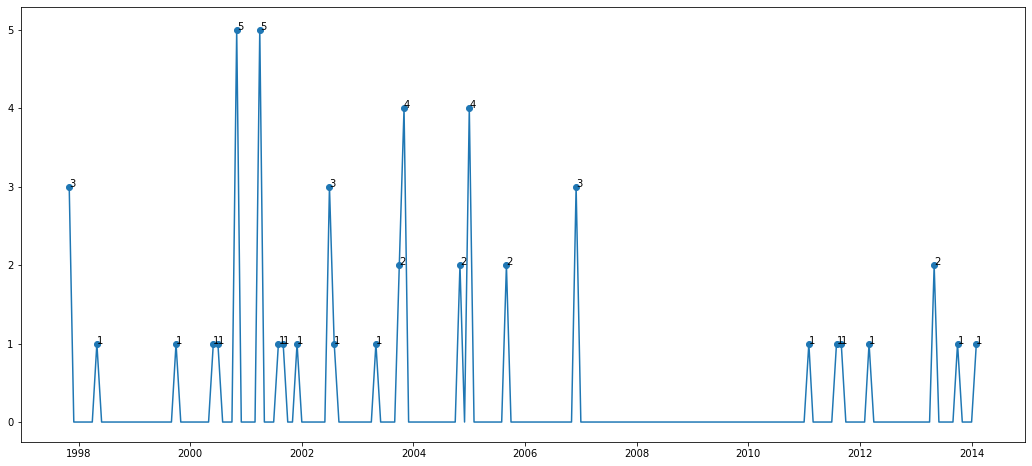

In [40]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as pyplot 
from dateutil.relativedelta import relativedelta 

mlist=list(map(lambda x: x.strftime("%Y-%m"),pd.to_datetime(dataframe5['start_datetime'])))
mindex=[] 
for ele in mlist:  
    if ele not in mindex:
        mindex.append(e) 
mindex.sort() 
mindex=pd.to_datetime(mindex) 

result = [] 
curr = mindex[0] 
last = mindex[-1]
while curr <= last:
    result.append(curr)    
    curr += relativedelta(months=1) 
result=pd.to_datetime(result) 
buffer = pd.DataFrame(0,columns=['month_value'], index=result) 
dataframe7 = pd.DataFrame(0,columns=['month_value'], index=mindex)

for ele in mlist:  
    if ele in mindex:   
        buffer.xs(e)['month_value']=buffer.xs(e)['month_value']+1;       
        dataframe7.xs(e)['month_value']=dataframe7.xs(e)['month_value']+1; 
pyplot.figure(figsize=(18,8)) 
pyplot.plot(result,buffer['month_value']) 

pyplot.scatter(mindex,dataframe7['month_value'])
mindex=list(map(lambda x: (x.strftime("%Y-%m")),mindex))
for i, t in enumerate(dataframe7['month_value']):   
    pyplot.annotate(t, (mindex[i],dataframe7['month_value'][i])) 
    
pyplot.show() 

In [16]:
#Sort each datetimein top 50 solar f lares dataset see if any matches,then x_class, and the differences 
#between the selected dates and the SpaceWeather date
ds = dataframe[['x_class', 'date', 'region', 'start_time', 'max_time', 'end_time']]
inf = dataframe3[['flare_classification', 'start_date', 'flare_region', 'start_time', 'cme_time', 'end_time']].copy() 
inf['row'] = range(1, 483) 
inf = inf[['row', 'flare_classification', 'start_date', 'flare_region', 'start_time', 'cme_time', 'end_time']] 

inf2 = inf.copy(); 
inf2['Rank by SpaceWeatherLive'] = (''); 

print(['row', 'x', 'start_date', 'region', 'start_time', 'max_time' , 'end_time']) 

for i in range (1,51):   
    x = ds.loc[[i], :].values[0][0];
    date = ds.loc[[i], :].values[0][1]; 
    ns = inf.loc[inf['start_date'] == date].values 
    if(ns.size == 0):  
        ns = inf.loc[inf['flare_classification'] == x].values       
    if(ns.size == 6):
        ns = ns[0];
    if(ns.size > 6):   
        temp = ns[0]; 
        for j in range(0,int((ns.size/7))):    
            if(abs(pd.to_datetime(ns[j][2]) - pd.to_datetime(date)) == abs(pd.to_datetime(temp[2]) - pd.to_datetime(date))):       
                temp = ns[j];    
        ns = temp; 
        print(i)
    if(ns.size == 0):      
        print('---Does not match---');   
    else:    
        print(ns)         
        row = (ns[0]);
        inf2.loc[row, 'Rank by SpaceWeatherLive'] = str(i); 
        inf2

['row', 'x', 'start_date', 'region', 'start_time', 'max_time', 'end_time']
1
[243 'X28.' '2003/11/04' '10486' '20:00' '19:54' '24:00']
2
[120 'X20.' '2001/04/02' '9393' '22:05' '22:06' '02:30']
3
[235 'X17.' '2003/10/28' '10486' '11:10' '11:30' '24:00']
4
[319 'X1.7' '2005/09/07' '10808' '18:05' '--:--' '00:00']
5
[129 'X14.' '2001/04/15' '9415' '14:05' '14:06' '13:00']
6
[236 'X10.' '2003/10/29' '10486' '20:55' '20:54' '24:00']
7
[9 'X9.4' '1997/11/06' '8100' '12:20' '12:10' '08:30']
---Does not match---
9
[331 'X9.0' '2006/12/05' '10930' '10:50' '--:--' '20:00']
10
[239 'X8.3' '2003/11/02' '10486' '17:30' '17:30' '01:00']
---Does not match---
12
[291 'X7.1' '2005/01/20' '10720' '07:15' '06:54' '16:30']
13
[361 'X6.9' '2011/08/09' '11263' '08:20' '08:12' '08:35']
14
[334 'X6.5' '2006/12/06' '10930' '19:00' '--:--' '24:00']
15
[320 'X6.2' '2005/09/09' '10808' '19:45' '19:48' '22:00']
16
[320 'X6.2' '2005/09/09' '10808' '19:45' '19:48' '22:00']
17
[84 'X5.7' '2000/07/14' '9077' '10:30' 

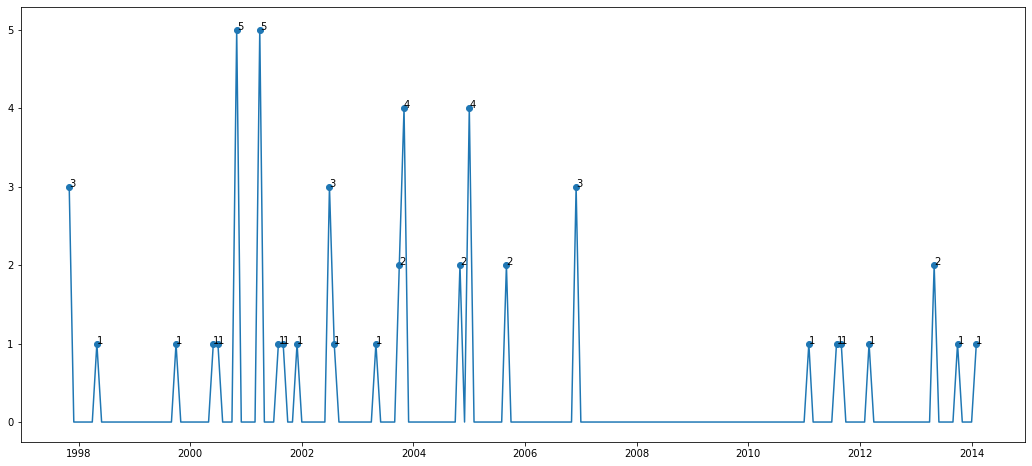